In [0]:
users = [
 { "id": 0, "name": "Hero" },
 { "id": 1, "name": "Dunn" },
 { "id": 2, "name": "Sue" },
 { "id": 3, "name": "Chi" },
 { "id": 4, "name": "Thor" },
 { "id": 5, "name": "Clive" },
 { "id": 6, "name": "Hicks" },
 { "id": 7, "name": "Devin" },
 { "id": 8, "name": "Kate" },
 { "id": 9, "name": "Klein" }
]


In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [0]:
for user in users:
    user["friends"] = []

In [0]:
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

In [0]:
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list
total_connections = sum(number_of_friends(user)
    for user in users) # 24
from __future__ import division # integer division is lame
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 2.4

In [6]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
    for user in users]
sorted(num_friends_by_id, # get it sorted
    key = lambda(user_id, num_friends): num_friends, # by num_friends
    reverse=True) # largest to smallest
# each pair is (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


SyntaxError: ignored

In [0]:
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
    for friend in user["friends"] # for each of user's friends
    for foaf in friend["friends"]] # get each of _their_ friends

In [8]:
users[0][Hero]

NameError: ignored

In [9]:
print [friend["id"] for friend in users[0]["friends"]] # [1, 2]
print [friend["id"] for friend in users[1]["friends"]] # [0, 2, 3]
print [friend["id"] for friend in users[2]["friends"]] # [0, 1, 3]

SyntaxError: ignored

In [10]:
from collections import Counter # not loaded by default
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]
def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
    for friend in user["friends"])
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
    for friend in user["friends"] # for each of my friends
    for foaf in friend["friends"] # count *their* friends
    if not_the_same(user, foaf) # who aren't me
    and not_friends(user, foaf)) # and aren't my friends
print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [0]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [0]:
def data_scientists_who_like(target_interest):
    return [user_id
    for user_id, user_interest in interests
    if user_interest == target_interest]


In [0]:
from collections import defaultdict
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [0]:
def most_common_interests_with(user):
    return Counter(interested_user_id
    for interest in interests_by_user_id[user["id"]]
    for interested_user_id in user_ids_by_interest[interest]
    if interested_user_id != user["id"])


In [0]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]


In [0]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [0]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [0]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [19]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}


AttributeError: ignored

In [0]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid" 

In [0]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [0]:
words_and_counts = Counter(word
 for user, interest in interests
 for word in interest.lower().split())

In [23]:
for word, count in words_and_counts.most_common():
    if count > 1:
print(word, count)

IndentationError: ignored

CHAPTER 3

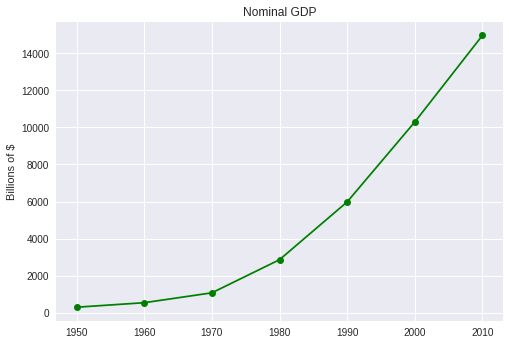

In [24]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

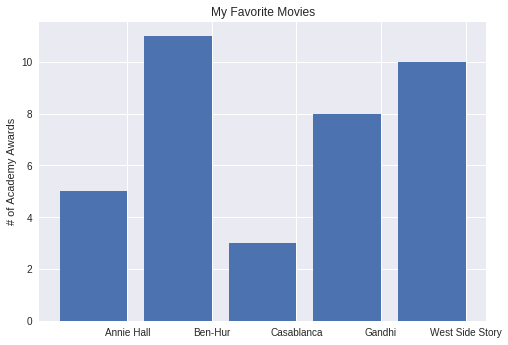

In [25]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

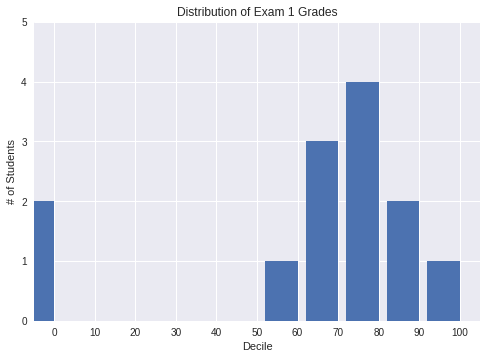

In [26]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
 histogram.values(), # give each bar its correct height
 8) # give each bar a width of 8
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
 # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

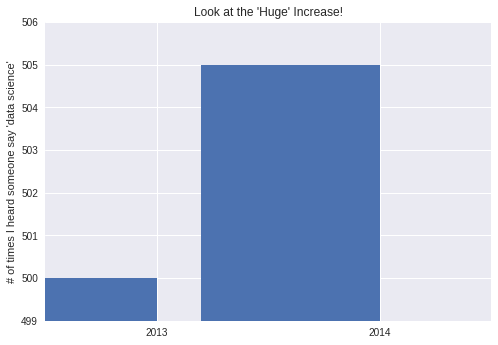

In [27]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()


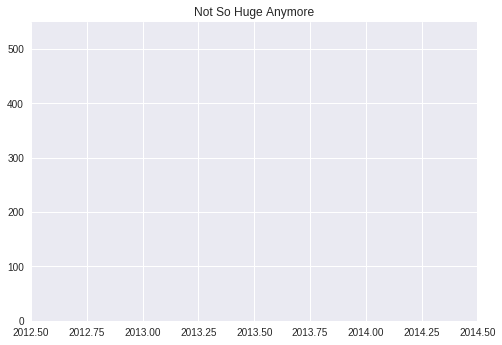

In [28]:
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

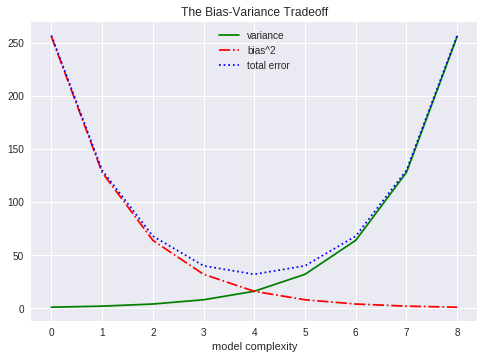

In [29]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

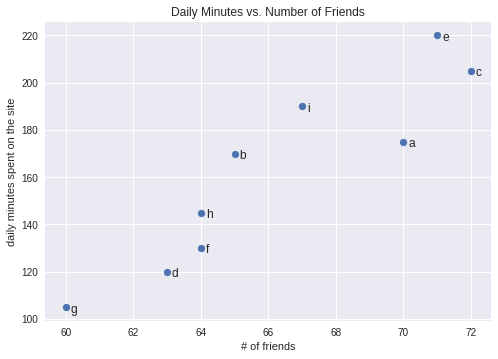

In [30]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
 plt.annotate(label,
 xy=(friend_count, minute_count), # put the label with its point
 xytext=(5, -5), # but slightly offset
 textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


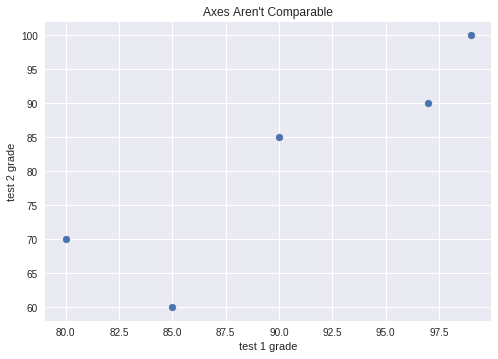

In [31]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

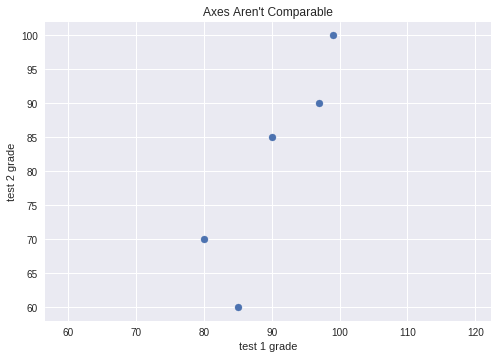

In [32]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

In [0]:
height_weight_age=[70,170,40]

In [0]:
grades=[95,80,75,62]

In [0]:
def vector_add(v,w):
  return [v_i + w_i
         for v_i, w_i in zip(v,w)]

In [0]:
def vector_subtract(v,w):
    return [v_i - w_i
         for v_i, w_i in zip(v,w)]

In [0]:
def vector_sum(vectors):
  result - vectors[0]
  for vector in vectors[1:]:
    result - vector_add(result,vector)
    return result

In [0]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [0]:
def scalar_multiply(c,v):
    return [c * v_i for v_i in v]

In [0]:
def vector_mean(vectors):
    n=len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [0]:
def dot(v,w):
    return sum(v_i * w_i
            for v_i, w_i in zip(v,w))

In [0]:
def sum_of_squares(v):
    return dot(v,v)

In [0]:
import math

In [0]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [0]:
def square_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

In [0]:
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

In [0]:
A=[[1,2,3],[4,5,6]]

In [0]:
b=[[1,2],[3,4],[5,6]]

In [49]:
def shape(A):
  num_rows=len(A)
  num_cols=len(A[0]) if A else 0
    return num_rows, num_cols

IndentationError: ignored

In [0]:
def get_row(A, i):
    return A[i]

In [0]:
def get_column(A, j):
    return [A_i[j]
         for A_i in A]

In [0]:
def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i,j)
          for j in range(num_cols)]
          for i in range(num_rows)]

In [0]:
def is_diagonal(i, j):
    return 1 if i == j else 0

In [0]:
identity_matrix = make_matrix(5, 5, is_diagonal)

In [0]:
data=[[70,170,40],[65,120,26],[77,250,19]]

In [0]:
friendships=[(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [0]:
friendships=[[0,1,1,0,0,0,0,0,0,0],
             [1,0,1,1,0,0,0,0,0,0],
             [1,1,0,1,0,0,0,0,0,0],
             [0,1,1,0,1,0,0,0,0,0],
             [0,0,0,1,0,1,0,0,0,0],
             [0,0,0,0,1,0,1,1,0,0],
             [0,0,0,0,0,1,0,0,1,0],
             [0,0,0,0,0,1,0,0,1,0],
             [0,0,0,0,0,0,1,1,0,1],
             [0,0,0,0,0,0,0,0,1,0]]

In [57]:
friendships[0][2]==1
friendships[0][8]==1

False

In [0]:
friends_of_five=[i
                for i, is_friend in enumerate(friendships[5])
                if is_friend]

In [0]:
def bucketize(point, bucket_size):
    return bucket_size*math.floor(point/bucket_size)

In [0]:
def make_histogram(points,bucket_size):
    return Counter(bucketize(point, bucket_size) for point in points)

In [0]:
def plot_histogram(points, bucket_size, title=""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(),width=bucket_size)
  plt.title(title)
  plt.show()

In [0]:
import random
random.seed(0)

In [0]:
uniform=[200*random.random()-100 for _ in range(10000)]

In [64]:
normal = [57 * inverse_normal_cdf(random.random())
         for _ in range(10000)]

NameError: ignored

In [0]:
from collections import Counter

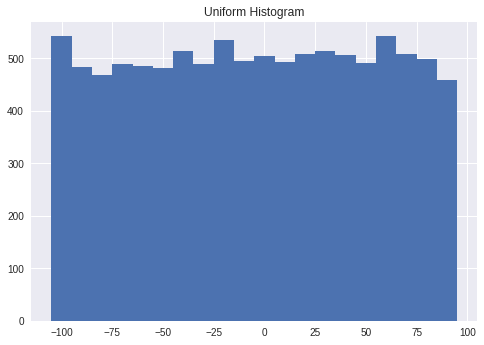

In [66]:
import matplotlib.pyplot as plt
plot_histogram(uniform, 10, "Uniform Histogram")

In [67]:
plot_histogram(normal, 10,"Normal Histogram")

NameError: ignored

In [0]:
def random_normal():
    return inverse_normal_cdf(random.random())

In [69]:
xs=[random_normal() for _ in range(1000)]
ys1=[x+random_normal()/2 for x in xs]
ys2=[-x+random_normal()/2 for x in xs]

NameError: ignored

In [70]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

NameError: ignored

In [71]:
print correlation(xs,ys1)
print correlation(xs,ys2)

SyntaxError: ignored

In [0]:
def correlation_matrix(data):
  _, num_columns = shape(data)
  def matrix_entry(i,j):
    return correlation(get_column(data,i), get_column(data,j))
  return make_matrix(num_columns, num_columns, matrix_entry)

In [0]:
import matplotlib.pyplot as plt

In [74]:
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)
for i in range(num_columns):
    for j in range(num_columns):
    if i!=j:ax[i][j].scatter(get_column(data,j), get_column(data,i))
    else: ax[i][j].annotate("series" + str(i),(0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")
    if i<num_columns -1:ax[i][j].xaxis.set_visible(False)
    if j>0:ax[i][j].yaxis.set_visible(False)
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

IndentationError: ignored

In [75]:
a_to_b=distance([63,150],[67,160])
a_to_c=distance([63,150],[70,171])
b_to_c=distance([67,160],[70,171])

NameError: ignored

In [0]:
def scale(data_matrix):
  num_rows, num_cols=shape(data_matrix)
  means=[mean(get_column(data_matrix,j))
        for j in range(num_cols)]
  stdevs=[standard_deviation(get_column(data_matrix,j))
         for j in range(num_cols)]
  return means, stdevs

In [77]:
def rescale(data_matrix):
  means,stdevs = scale(data_matrix)
  def rescaled(i,j):
    if stdevs(i,j):
        return (data_matrix[i][j]-means[j])/stdevs[j]
    else:
        return data_matrix[i][j]
  num_rows, num_cols=shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

IndentationError: ignored

In [78]:
def de_mean_matrix(A):
  nr,nc=shape(A)
  column_means, _ - scale(A)
    return make_matrix(nr, nc, lambda i, j:A[i][j]-column_means[j])

IndentationError: ignored

In [0]:
def direction(w):
  mag=magnitude(w)
  return [w_i/mag for w_i in w]

In [0]:
def directional_variance_i(x_i, w):
    return dot(x_i, direction(w))

In [0]:
def directional_variance(X,w):
    return sum(directional_variance_i(x_i,w)
            for x_i in X)

In [0]:
def directional_variance_gradient_i(x_i, w):
  projection_length = dot(x_i, direction(w))
  return [2*projection_length *x_ij for x_ij in x_i]

In [0]:
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,2)
                   for x_i in X)

In [84]:
def first_principal_component(X):
  guess=[1 for _ in X[0]]
  unscaled_maximizer = maximize_batch(
      partial(directional_variance, X),
      partial(directional_variance_gradient, X),
      guess)
    return direction(unscaled_maximizer)

IndentationError: ignored

In [0]:
def project(v,w):
  projection_length=dot(v,w)
  return scalar_multiply(projection_length, w)

In [0]:
def remove_projection_from_vector(v,w):
    return vector_subtract(v,project(v,w))

In [0]:
def remove_projection(X, w):
    return [remove_projection_from_vector(x_i_w) for x_i in X]

In [0]:
def principal_component_analysis(X, num_components):
  components = []
  for _ in range(num_components):
    component=first_principal_component(X)
    components.append(compoent)
    X=remove_projection(X, component)
    return components

In [0]:
def transform_vector(v, components):
    return [dot(v,w) for w in components]

In [0]:
def transform (X, components):
    return [transform_vector(x_i, components) for x_i in X]